In [1]:
import random
import warnings

import numpy as np
import pandas as pd
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import MatplotlibDeprecationWarning

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

SEED = 0
DF_PATH = '../input/classification-of-robots-from-their-conversation/Classification of Robots from their conversation sequence.csv'
T_COLS = [f"num{i+1}" for i in range(10)]

%matplotlib inline

In [2]:
df = pd.read_csv(DF_PATH)
df['kind'] = [(i // 5) for i in range(len(df))]
df.head(6)

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,kind
0,0,2,5,2,5,6,2,1,8,1,3,0
1,1,1747,1749,1751,1758,1765,1767,1772,1774,1783,1785,0
2,2,65056,195168,1561344,7806720,31226880,187361280,749445120,6745006080,6745006080,6745006080,0
3,3,2855,2860,2865,2870,2875,2880,2885,2890,2895,2900,0
4,4,11440,57200,286000,1430000,7150000,35750000,178750000,893750000,4468750000,22343750000,0
5,0,4,9,5,4,8,6,6,7,7,2,1


In [3]:
df.groupby('source').describe()

num1                                                             \
           count         mean           std  min      25%      50%      75%   
source                                                                        
0       100000.0      5.00595      2.580764  1.0      3.0      5.0      7.0   
1       100000.0   5016.94100   2888.393016  1.0   2517.0   5025.0   7514.0   
2       100000.0  24941.54662  20698.570587  0.0   7988.0  19013.0  37630.0   
3       100000.0   4994.79766   2886.610003  5.0   2489.0   4986.0   7495.0   
4       100000.0  24944.89545  14420.286051  0.0  12515.0  24950.0  37425.0   

                     num2                ...         num10                \
            max     count          mean  ...           75%           max   
source                                   ...                               
0           9.0  100000.0       5.00523  ...  7.000000e+00  9.000000e+00   
1       10008.0  100000.0    5021.93799  ...  7.559000e+03  1.006200e+04   
2       89991.0  100000.0  124606.37992  ...  2.908896e+10  1.010349e+13   
3       10005.0  100000.0    4999.79766  ...  7.540000e+03  1.005000e+04   
4       50000.0  100000.0  124724.47725  ...  7.309570e+10  9.765625e+10   

            kind                                                           \
           count     mean           std  min       25%      50%       75%   
source                                                                      
0       100000.0  49999.5  28867.657797  0.0  24999.75  49999.5  74999.25   
1       100000.0  49999.5  28867.657797  0.0  24999.75  49999.5  74999.25   
2       100000.0  49999.5  28867.657797  0.0  24999.75  49999.5  74999.25   
3       100000.0  49999.5  28867.657797  0.0  24999.75  49999.5  74999.25   
4       100000.0  49999.5  28867.657797  0.0  24999.75  49999.5  74999.25   

                 
            max  
source           
0       99999.0  
1       99999.0  
2       99999.0  
3       99999.0  
4       99999.0  

[5 rows x 88 columns]

In [4]:
grad_df = pd.DataFrame(np.gradient(df[T_COLS].to_numpy(), axis=1), columns=[f'grad_{x}' for x in T_COLS])
grad_df['source'] = df['source']
grad_df.groupby('source').describe()

grad_num1                                                     \
           count         mean            std  min      25%      50%   
source                                                                
0       100000.0     -0.00072       3.652401 -8.0     -3.0      0.0   
1       100000.0      4.99699       2.581710  1.0      3.0      5.0   
2       100000.0  99664.83330  117688.569087  0.0  15348.0  55464.0   
3       100000.0      5.00000       0.000000  5.0      5.0      5.0   
4       100000.0  99779.58180   57681.144203  0.0  50060.0  99800.0   

                            grad_num2                 ...     grad_num9  \
              75%       max     count           mean  ...           75%   
source                                                ...                 
0            3.00       8.0  100000.0      -0.000615  ...  1.500000e+00   
1            7.00       9.0  100000.0       5.002665  ...  6.500000e+00   
2       142549.75  719928.0  100000.0  299581.250315  ...  1.366950e+10   
3            5.00       5.0  100000.0       5.000000  ...  5.000000e+00   
4       149700.00  200000.0  100000.0  299338.745400  ...  3.508594e+10   

                     grad_num10                                   \
                 max      count          mean           std  min   
source                                                             
0       4.000000e+00   100000.0 -5.640000e-03  3.652813e+00 -8.0   
1       9.000000e+00   100000.0  4.997700e+00  2.575547e+00  1.0   
2       4.972814e+12   100000.0  3.930248e+10  1.521224e+11  0.0   
3       5.000000e+00   100000.0  5.000000e+00  0.000000e+00  5.0   
4       4.687500e+10   100000.0  3.897640e+10  2.253170e+10  0.0   

                                                                
                 25%           50%           75%           max  
source                                                          
0      -3.000000e+00  0.000000e+00  3.000000e+00  8.000000e+00  
1       3.000000e+00  5.000000e+00  7.000000e+00  9.000000e+00  
2       4.726756e+08  3.943447e+09  2.139283e+10  8.840558e+12  
3       5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  
4       1.955469e+10  3.898438e+10  5.847656e+10  7.812500e+10  

[5 rows x 80 columns]

In [5]:
# There is a lot of data - pick some random samples
random.seed(SEED)
SUB_SAMPLE_FRAC = 0.001

kinds = df.kind.unique()

k = int(len(kinds) * SUB_SAMPLE_FRAC)
kinds = random.choices(kinds, k=k)

df = df[df.kind.isin(kinds)]
df.head(6)

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,kind
570,0,9,4,6,3,8,7,6,7,7,5,114
571,1,6987,6992,6997,7002,7007,7008,7014,7018,7024,7033,114
572,2,3256,13024,91168,273504,2461536,17230752,137846016,275692032,551384064,551384064,114
573,3,9547,9552,9557,9562,9567,9572,9577,9582,9587,9592,114
574,4,32505,162525,812625,4063125,20315625,101578125,507890625,2539453125,12697265625,63486328125,114
7020,0,1,9,3,5,6,9,9,3,8,2,1404


In [6]:
# Train test split
TEST_SIZE = 0.2
random.seed(SEED)

kinds = df.kind.unique()
k = int(len(kinds) * TEST_SIZE)
test_kinds = random.choices(kinds, k=k)
train_kinds = kinds[~np.isin(kinds, test_kinds)]

# Split and shuffle (sample(1))
df_train = df[df.kind.isin(train_kinds)].sample(frac=1).copy()
df_test = df[df.kind.isin(test_kinds)].sample(frac=1).copy()

assert len(df) == len(df_train) + len(df_test)

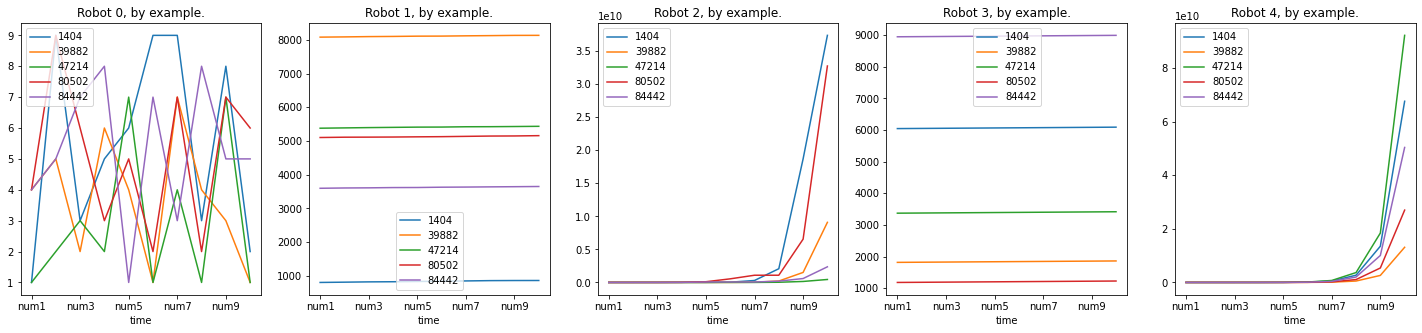

In [7]:
rnd_kinds = random.choices(df_train.kind.unique(), k=5)
temp_df = pd.melt(df_train, id_vars=['source', 'kind'], value_vars=T_COLS, var_name='time')
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for i, axx in enumerate(ax):
    for kind, gp in temp_df[(temp_df.source == i) & (temp_df.kind.isin(rnd_kinds))].groupby('kind'):
        gp.plot(x='time', y='value', ax=axx, label=kind, title=f'Robot {i}, by example.', sharex=True)

plt.show()        
plt.close()
del temp_df

Distinguisting between 0 vs (1 or 3) vs (2 or 4) seems easy, but distinguishing (1 from 3) or (2 from 4) not as much.

In [8]:
from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler()

# fit and transform the data - we are careful to only fit the scaler on the train data, so as not to cause leakage
df_train[T_COLS] = zscaler.fit_transform(df_train[T_COLS])
df_test[T_COLS] = zscaler.transform(df_test[T_COLS])

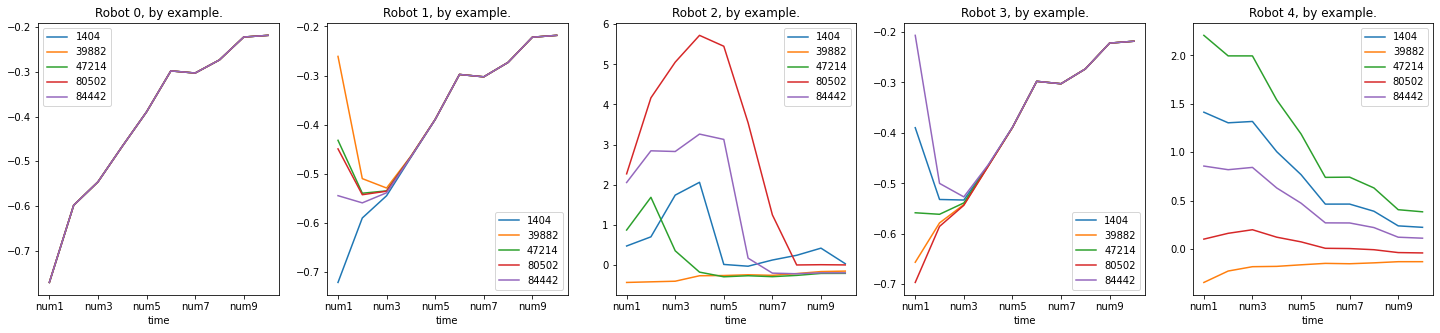

In [9]:
temp_df = pd.melt(df_train, id_vars=['source', 'kind'], value_vars=T_COLS, var_name='time')
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for i, axx in enumerate(ax):
    for kind, gp in temp_df[(temp_df.source == i) & (temp_df.kind.isin(rnd_kinds))].groupby('kind'):
        gp.plot(x='time', y='value', ax=axx, label=kind, title=f'Robot {i}, by example.', sharex=True)

plt.show()
plt.close()
del temp_df

# Feature extraction w/ tsfresh

Extract features with tsfresh, train model.

In [10]:
# Prepare new df for tsfresh
ts_test = pd.melt(df_test, id_vars=['source', 'kind'], value_vars=T_COLS, var_name='time')
ts_train = pd.melt(df_train, id_vars=['source', 'kind'], value_vars=T_COLS, var_name='time')

ts_test.time = ts_test.time.apply(lambda x: int(x.strip('num')))
ts_train.time = ts_train.time.apply(lambda x: int(x.strip('num')))

# We want to predict 'source' as dependent variable, make a new variable and drop it from dataframe.
y_train, y_test = ts_train.source, ts_test.source
ts_train['id'] = ts_train.index
ts_train = ts_train.drop(columns=['source', 'kind'])
ts_test['id'] = ts_test.index
ts_test = ts_test.drop(columns=['source', 'kind'])

print(y_train.values[:12])
ts_train.head(12)

[1 1 1 3 1 2 3 0 1 0 4 1]


,time,value,id
0,1,-0.761650,0
1,1,-0.677401,1
2,1,-0.727736,2
3,1,-0.544268,3
4,1,-0.624350,4
5,1,-0.440187,5
6,1,-0.768408,6
7,1,-0.771250,7
8,1,-0.375263,8
9,1,-0.770934,9


In [11]:
import tsfresh
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters

extraction_settings = ComprehensiveFCParameters()
# extraction_settings = MinimalFCParameters()

x_train = extract_relevant_features(
    ts_train,
    y_train,
    column_id='id',
    column_sort='time',
    default_fc_parameters=extraction_settings,
)

x_train.head(5)

Feature Extraction: 100%|██████████| 5/5 [02:47<00:00, 33.43s/it]


,value__count_below__t_0,value__range_count__max_1000000000000.0__min_0,"value__fft_coefficient__attr_""angle""__coeff_0",value__count_above__t_0,"value__fft_coefficient__attr_""real""__coeff_0","value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)",value__quantile__q_0.9,...,value__maximum,value__mean,value__median,value__quantile__q_0.4,value__quantile__q_0.7,value__range_count__max_1__min_-1,value__benford_correlation,value__root_mean_square,"value__fft_coefficient__attr_""abs""__coeff_0",value__abs_energy
0,1.0,0.0,180.0,0.0,-0.761650,-0.147714,-0.208900,-0.295429,-0.467114,-0.761650,...,-0.761650,-0.761650,-0.761650,-0.761650,-0.761650,1.0,-0.241690,0.761650,0.761650,0.580111
1,1.0,0.0,180.0,0.0,-0.677401,-0.131375,-0.185792,-0.262750,-0.415444,-0.677401,...,-0.677401,-0.677401,-0.677401,-0.677401,-0.677401,1.0,-0.200946,0.677401,0.677401,0.458871
2,1.0,0.0,180.0,0.0,-0.727736,-0.141137,-0.199598,-0.282274,-0.446314,-0.727736,...,-0.727736,-0.727736,-0.727736,-0.727736,-0.727736,1.0,-0.241690,0.727736,0.727736,0.529599
3,1.0,0.0,180.0,0.0,-0.544268,-0.105555,-0.149278,-0.211110,-0.333795,-0.544268,...,-0.544268,-0.544268,-0.544268,-0.544268,-0.544268,1.0,-0.145280,0.544268,0.544268,0.296228
4,1.0,0.0,180.0,0.0,-0.624350,-0.121086,-0.171242,-0.242172,-0.382908,-0.624350,...,-0.624350,-0.624350,-0.624350,-0.624350,-0.624350,1.0,-0.200946,0.624350,0.624350,0.389812


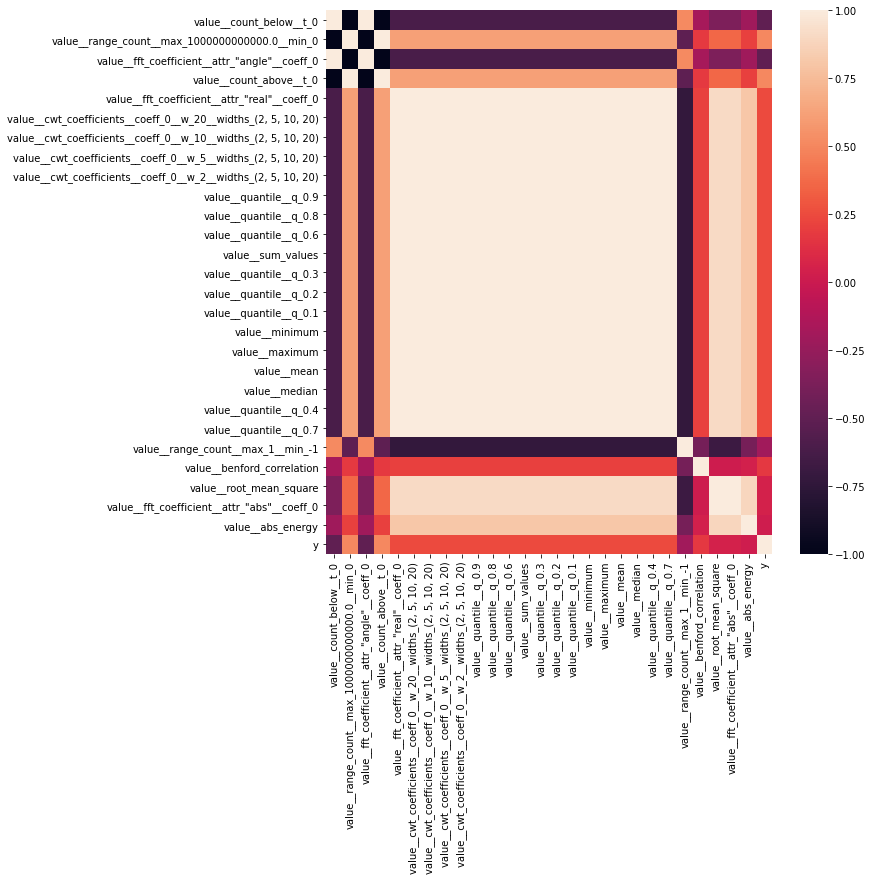

value__count_below__t_0                                          0.503895
value__range_count__max_1000000000000.0__min_0                   0.503895
value__fft_coefficient__attr_"angle"__coeff_0                    0.503895
value__count_above__t_0                                          0.503895
value__quantile__q_0.1                                           0.247404
value__fft_coefficient__attr_"real"__coeff_0                     0.247404
value__quantile__q_0.9                                           0.247404
value__quantile__q_0.8                                           0.247404
value__quantile__q_0.6                                           0.247404
value__sum_values                                                0.247404
value__quantile__q_0.2                                           0.247404
value__quantile__q_0.3                                           0.247404
value__minimum                                                   0.247404
value__maximum                        

In [12]:
corr = x_train.copy()
corr['y'] = y_train
corr = corr.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
corr['y'].drop('y').abs().sort_values(ascending=False)

In [13]:
train_parameters = tsfresh.feature_extraction.settings.from_columns(x_train)
x_test = extract_features(
    ts_test,
    column_id='id',
    column_sort='time',
    kind_to_fc_parameters=train_parameters
)
x_test.head(2)

Feature Extraction: 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


,value__count_below__t_0,value__range_count__max_1000000000000.0__min_0,value__range_count__max_1__min_-1,"value__fft_coefficient__attr_""angle""__coeff_0","value__fft_coefficient__attr_""real""__coeff_0","value__fft_coefficient__attr_""abs""__coeff_0",value__count_above__t_0,"value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",...,value__quantile__q_0.4,value__quantile__q_0.7,value__sum_values,value__minimum,value__maximum,value__mean,value__median,value__benford_correlation,value__root_mean_square,value__abs_energy
0,1.0,0.0,1.0,180.0,-0.737335,0.737335,0.0,-0.142999,-0.202231,-0.285997,...,-0.737335,-0.737335,-0.737335,-0.737335,-0.737335,-0.737335,-0.737335,-0.241690,0.737335,0.543664
1,1.0,0.0,1.0,180.0,-0.151943,0.151943,0.0,-0.029468,-0.041674,-0.058936,...,-0.151943,-0.151943,-0.151943,-0.151943,-0.151943,-0.151943,-0.151943,0.864123,0.151943,0.023087


In [14]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("RF")
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

rf_bagged = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=0).fit(x_train, y_train)
y_pred = rf_bagged.predict(x_test)
print("RF Bagged")
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

xgbc = XGBClassifier(use_label_encoder=False).fit(x_train, y_train)
y_pred = xgbc.predict(x_test)
print("XGBC")
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

RF
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       160
           1       0.46      0.38      0.41       160
           2       0.30      0.83      0.44       160
           3       0.41      0.10      0.16       160
           4       0.58      0.16      0.25       160

    accuracy                           0.46       800
   macro avg       0.54      0.46      0.43       800
weighted avg       0.54      0.46      0.43       800

[[128   0  32   0   0]
 [  4  61  74  21   0]
 [  1   6 133   1  19]
 [  1  62  81  16   0]
 [  1   5 127   1  26]]
RF Bagged
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       160
           1       0.47      0.41      0.44       160
           2       0.38      0.82      0.52       160
           3       0.44      0.33      0.38       160
           4       0.66      0.24      0.36       160

    accuracy                           0.52       800
  

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F

As expected, the the model is good at predicting 0 vs (1 or 3) vs (2 or 4) but often gets confused between (1 vs 3) or (2 vs 4).

Indeed, Kolmogorv-Smirnov test shows that 1 & 3 are very likely to be the same distribution (high value for all columns) 2 and 4 are different though

https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

In [15]:
from scipy.stats import ks_2samp

df = pd.read_csv(DF_PATH)

print("Cols 1 vs 3")
for col in T_COLS:
    print(ks_2samp(df[df.source == 1][col].values, df[df.source == 3][col].values))
    
print("\nCols 2 vs 4")
for col in T_COLS:
    print(ks_2samp(df[df.source == 2][col].values, df[df.source == 4][col].values))

Cols 1 vs 3
KstestResult(statistic=0.005110000000000059, pvalue=0.1463337632186259)
KstestResult(statistic=0.005079999999999973, pvalue=0.15087362675694294)
KstestResult(statistic=0.005070000000000019, pvalue=0.1524117914893205)
KstestResult(statistic=0.005079999999999973, pvalue=0.15087362675694294)
KstestResult(statistic=0.005099999999999993, pvalue=0.14783467562962205)
KstestResult(statistic=0.005090000000000039, pvalue=0.14934794244043148)
KstestResult(statistic=0.0050800000000000844, pvalue=0.15087362675692584)
KstestResult(statistic=0.005089999999999983, pvalue=0.14934794244044003)
KstestResult(statistic=0.005060000000000009, pvalue=0.15396249934211315)
KstestResult(statistic=0.005070000000000019, pvalue=0.1524117914893205)

Cols 2 vs 4
KstestResult(statistic=0.13966999999999996, pvalue=0.0)
KstestResult(statistic=0.19812000000000002, pvalue=0.0)
KstestResult(statistic=0.25235, pvalue=0.0)
KstestResult(statistic=0.29968, pvalue=0.0)
KstestResult(statistic=0.33908000000000005, pva

In [16]:
x_train = x_train[y_train != 3]
x_test = x_test[y_test != 3]
y_train = y_train[y_train != 3]
y_test = y_test[y_test != 3]

y_train[y_train == 4] = 3
y_test[y_test == 4] = 3


rf = RandomForestClassifier(random_state=0).fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("RF")
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

rf_bagged = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=0).fit(x_train, y_train)
y_pred = rf_bagged.predict(x_test)
print("RF Bagged")
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

xgbc = XGBClassifier(use_label_encoder=False).fit(x_train, y_train)
y_pred = xgbc.predict(x_test)
print("XGBC")
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

RF
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       160
           1       0.82      0.72      0.77       160
           2       0.41      0.79      0.54       160
           3       0.49      0.18      0.26       160

    accuracy                           0.62       640
   macro avg       0.68      0.62      0.61       640
weighted avg       0.68      0.62      0.61       640

[[128  16  16   0]
 [  1 116  43   0]
 [  0   4 126  30]
 [  1   6 124  29]]
RF Bagged
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       160
           1       0.82      0.79      0.81       160
           2       0.45      0.82      0.58       160
           3       0.62      0.23      0.33       160

    accuracy                           0.66       640
   macro avg       0.71      0.66      0.65       640
weighted avg       0.71      0.66      0.65       640

[[128  16  16   0]
 [  1 127  32   0]
 [

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F

# FCN

https://keras.io/examples/timeseries/timeseries_classification_from_scratch/

In [17]:
from tensorflow import keras

def make_model(input_shape, num_classes, num_layers=1):
    """From https://arxiv.org/abs/1611.06455."""
    input_layer = x = keras.layers.Input(input_shape)

    for _ in range(num_layers):
        x = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(x)
        x = keras.layers.BatchNormalization()(x)
        x = keras.layers.ReLU()(x)
    
    x = keras.layers.Dropout(0.1)(x)
    x = keras.layers.GlobalAveragePooling1D()(x)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(x)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

TEST_SIZE = 0.2

df = pd.read_csv(DF_PATH)

df = df[df.source != 3]  # Remove robot 3, since it's the same as 1, as we already proved
df.loc[df.source == 4, 'source'] = 3 #.values = 3  # Also rename claess 4 to class 3 so we can still use sparsecrossentropy

x, y = df[T_COLS].to_numpy(), df['source'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0, test_size=TEST_SIZE, shuffle=True)

zscaler = StandardScaler()

# fit and transform the data - we are careful to only fit the scaler on the train data, so as not to cause leakage
x_train = zscaler.fit_transform(x_train)
x_test = zscaler.transform(x_test)

# Reshape
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [19]:
# Train
LR = 1e-3
EPOCHS = 500
BATCH_SIZE = 128

callbacks = [
    keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss", verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=1e-7, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

model = make_model(input_shape=x_train.shape[1:], num_classes=len(np.unique(y_train)))

model.compile(
    optimizer=keras.optimizers.Adam(LR),
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

print(model.summary())

history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 64)            256       
_________________________________________________________________
batch_normalization (BatchNo (None, 10, 64)            256       
_________________________________________________________________
re_lu (ReLU)                 (None, 10, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 260   

In [20]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(cr(y_pred=y_pred, y_true=y_test))
print(cm(y_pred=y_pred, y_true=y_test))

2500/2500 [==============================] - 5s 2ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9679
Test accuracy 0.9678500294685364
Test loss 0.10604709386825562
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     20000
           1       0.95      0.97      0.96     20000
           2       1.00      0.93      0.97     20000
           3       1.00      0.97      0.99     20000

    accuracy                           0.97     80000
   macro avg       0.97      0.97      0.97     80000
weighted avg       0.97      0.97      0.97     80000

[[20000     0     0     0]
 [  664 19336     0     0]
 [  386   936 18670     8]
 [  578     0     0 19422]]


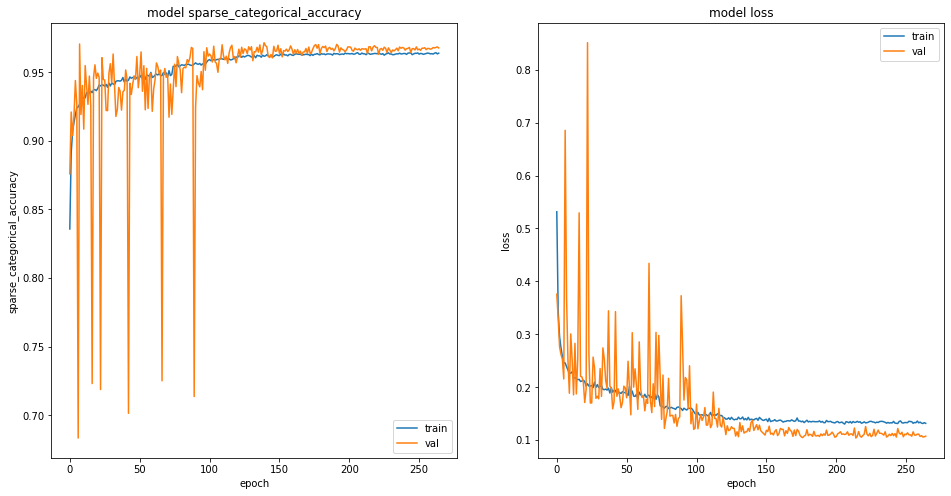

In [21]:
metrics = ["sparse_categorical_accuracy", "loss"]
fig, axs = plt.subplots(1, len(metrics), figsize=(16, 16/len(metrics)))
for metric, ax in zip(metrics, axs):
    ax.plot(history.history[metric])
    ax.plot(history.history["val_" + metric])
    ax.set_title("model " + metric)
    ax.set(ylabel=metric, xlabel='epoch')
    ax.legend(["train", "val"], loc="best")

plt.show()

After deleting robot 3, this model solves this task quite easily.